In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
def load_news( url ) :
  req = requests.get(url)

  with open('./news.html' , 'w') as f :
    f.write(req.text)


In [3]:
load_news('https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en' )

In [4]:
with open('./news.html' , 'r' ) as f :
  news_doc = f.read()

In [5]:
news_doc

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><rss version="2.0" xmlns:media="http://search.yahoo.com/mrss/"><channel><generator>NFE/5.0</generator><title>"green hydrogen" - Google News</title><link>https://news.google.com/search?q=green+hydrogen&amp;hl=en-IN&amp;gl=IN&amp;ceid=IN:en</link><language>en-IN</language><webMaster>news-webmaster@google.com</webMaster><copyright>2024 Google Inc.</copyright><lastBuildDate>Fri, 28 Jun 2024 13:11:01 GMT</lastBuildDate><description>Google News</description><item><title>Global investment firm invests €400m in new green hydrogen and ammonia joint venture - Hydrogen Insight</title><link>https://news.google.com/rss/articles/CBMiigFodHRwczovL3d3dy5oeWRyb2dlbmluc2lnaHQuY29tL3Byb2R1Y3Rpb24vZ2xvYmFsLWludmVzdG1lbnQtZmlybS1pbnZlc3RzLTQwMG0taW4tbmV3LWdyZWVuLWh5ZHJvZ2VuLWFuZC1hbW1vbmlhLWpvaW50LXZlbnR1cmUvMi0xLTE2NjgyMzfSAQA?oc=5</link><guid isPermaLink="false">CBMiigFodHRwczovL3d3dy5oeWRyb2dlbmluc2lnaHQuY29tL3Byb2R1Y3Rpb24vZ2xvYmFsLWludmVzdG1lbnQt

In [6]:
soup = BeautifulSoup( news_doc , 'xml')

In [7]:
news_dict = { 'headline' : [] , 'Day' : [] , 'Date' : [] , 'Month' : [] , 'Year' : [] , 'Time' : [] , 'Zone' : [] }

In [8]:
headlines = soup.select('item' )

In [9]:
news_dict['headline']

[]

In [10]:
for headline in headlines:

  h = headline.find('title')
  d = headline.find('pubDate')
  h1 = h.string
  d = d.get_text()
  d = d.split()


  news_dict['headline'].append(h1)

  news_dict['Day'].append(d[0])
  news_dict['Date'].append(d[1])
  news_dict['Month'].append(d[2])
  news_dict['Year'].append(d[3])
  news_dict['Time'].append(d[4])
  news_dict['Zone'].append(d[5])



In [11]:
# news_dict

In [12]:
news = pd.DataFrame.from_dict(  news_dict )

In [13]:
news.shape

(102, 7)

In [14]:
news.head()

,headline,Day,Date,Month,Year,Time,Zone
0,Global investment firm invests €400m in new gr...,"Thu,",27,Jun,2024,14:41:57,GMT
1,KKR and IGNIS Team Up To Develop Green Hydroge...,"Fri,",28,Jun,2024,01:30:00,GMT
2,Uría Menéndez and Clifford Chance advise on €4...,"Wed,",26,Jun,2024,15:45:00,GMT
3,What India Can Do to Site Green Hydrogen Produ...,"Fri,",28,Jun,2024,07:28:11,GMT
4,Adani Group's Arun Sharma Advocates for Green ...,"Fri,",28,Jun,2024,06:04:17,GMT


In [15]:
news['headline'][0]

'Global investment firm invests €400m in new green hydrogen and ammonia joint venture - Hydrogen Insight'

In [16]:
from transformers import pipeline

# Load the sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

# Your input data (replace this with your actual data)
texts = [
    "Green Hydrogen Revolution in Indian Steel: National Mission Unleashes Promising Pilot Initiatives - SolarQuarter"
]

# Predict sentiment for each text
results = sentiment_analysis(texts)

# Display the results
for text, result in zip(texts, results):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {result['label']} ({result['score']:.4f})")
    print()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
sent  = {'label' : [] , 'score' : [] }

In [ ]:
for statement in news['headline']:
    result = sentiment_analysis(statement)
    sent['label'].append(result[0]['label'])
    sent['score'].append(result[0]['score'])


In [ ]:
# sent['label']

In [ ]:
news['sentiment_label'] = sent['label']

In [ ]:
news['sentiment_score'] = sent['score']

In [ ]:
news.head()
news.drop(['named_entities'] , axis=1 , inplace = True )

In [ ]:
import spacy
import pandas as pd
from bs4 import BeautifulSoup
from bs4.element import NavigableString


nlp = spacy.load("en_core_web_sm")

#  converting NavigableString to string
def convert_to_string(element):
    if isinstance(element, (str, NavigableString)):
        return str(element)
    else:
        return ""

# ApplyingspaCy NER to a sentence and extract organizations
def extract_organizations_spacy(sentence):

    sentence = convert_to_string(sentence)

    doc = nlp(sentence)
    organizations = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return organizations


news['organizations_spacy'] = news['headline'].apply(extract_organizations_spacy)
news.drop(['organizations'] , axis=1 , inplace =True )

news

,headline,Day,Date,Month,Year,Time,Zone,sentiment_label,sentiment_score,organizations_spacy
0,"""Once Volume Increases, Green Hydrogen Will Co...","Tue,",06,Feb,2024,12:51:44,GMT,NEGATIVE,0.996130,[]
1,Envision Energy Partners with BASF to Boost Gr...,"Tue,",06,Feb,2024,12:25:00,GMT,POSITIVE,0.998004,"[Envision Energy Partners, BASF, Boost Green H..."
2,Green hydrogen: Proposals for projects worth ₹...,"Sun,",04,Feb,2024,02:32:04,GMT,POSITIVE,0.972791,[]
3,5 ways to make green hydrogen available around...,"Mon,",05,Feb,2024,17:30:45,GMT,POSITIVE,0.997399,[World Economic Forum - World Economic Forum]
4,IIPE in Visakhapatnam launches a pilot project...,"Sun,",04,Feb,2024,19:15:00,GMT,POSITIVE,0.905727,[NTPC]
...,...,...,...,...,...,...,...,...,...,...
94,Lhyfe Starts Building a New Green Hydrogen Pro...,"Fri,",02,Feb,2024,08:00:00,GMT,NEGATIVE,0.655757,[New Green Hydrogen Production Plant]
95,Gujarat-The Green Hydrogen Destination of Indi...,"Fri,",26,Jan,2024,00:07:40,GMT,POSITIVE,0.972710,"[The Green Hydrogen Destination of India, CMO]"
96,Electrolysis Reimagined: Turning Renewable Ene...,"Sun,",04,Feb,2024,18:29:08,GMT,NEGATIVE,0.911527,[]
97,Lhyfe to build green hydrogen plant in norther...,"Thu,",01,Feb,2024,16:10:31,GMT,POSITIVE,0.562092,[]


In [ ]:
# !pip install gspread google-auth google-auth-oauthlib google-auth-httplib2


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!pip install gspread oauth2client

In [ ]:
import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd

In [ ]:
news.to_csv('news_score.csv')

In [ ]:
csv_filename = '/content/news_score.csv'
df = pd.read_csv(csv_filename)

In [ ]:
sheet_name = 'GO_India_Stocks_Sheet_AA'
sh = gc.create(sheet_name)

worksheet = sh.get_worksheet(0)

worksheet.update([df.columns.values.tolist()] + df.values.tolist())

{'spreadsheetId': '1wjvCAgWxsTf9McTDUCsSzRsklT9W7qh5LQ3FeAHDkBQ',
 'updatedRange': 'Sheet1!A1:K100',
 'updatedRows': 100,
 'updatedColumns': 11,
 'updatedCells': 1100}

In [ ]:
# Sharing the google sheet to anyone with the link
# passing as a JSON API

sh.share("", perm_type="anyone", role="writer", notify=False)

In [ ]:
#  # World Cloudm Map
#  !pip install pandas matplotlib wordcloud


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_data = ' '.join(df['organizations_spacy'])


wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)




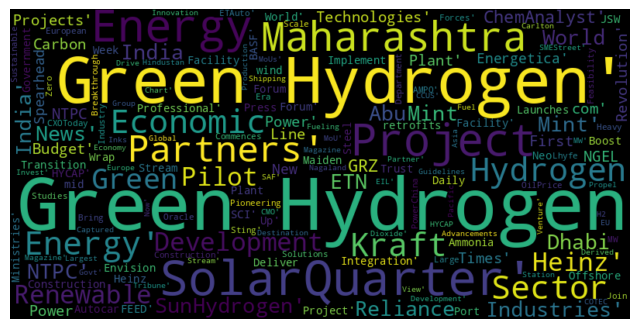

In [ ]:

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()